<b>Importamos las diferentes librerias que vamos a utilizar para hacer un EDA, ETL y probar modelos </b>

In [69]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.impute import KNNImputer
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv("all_video_games(cleaned).csv")

In [4]:
df.head()

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."


In [5]:
df.dropna(subset=['Title', "Genres", 'Genres Splitted'], inplace=True)

In [6]:
df['Genres Splitted'] = df['Genres Splitted'].apply(literal_eval)
df["Platforms Info"] = df["Platforms Info"].apply(literal_eval)

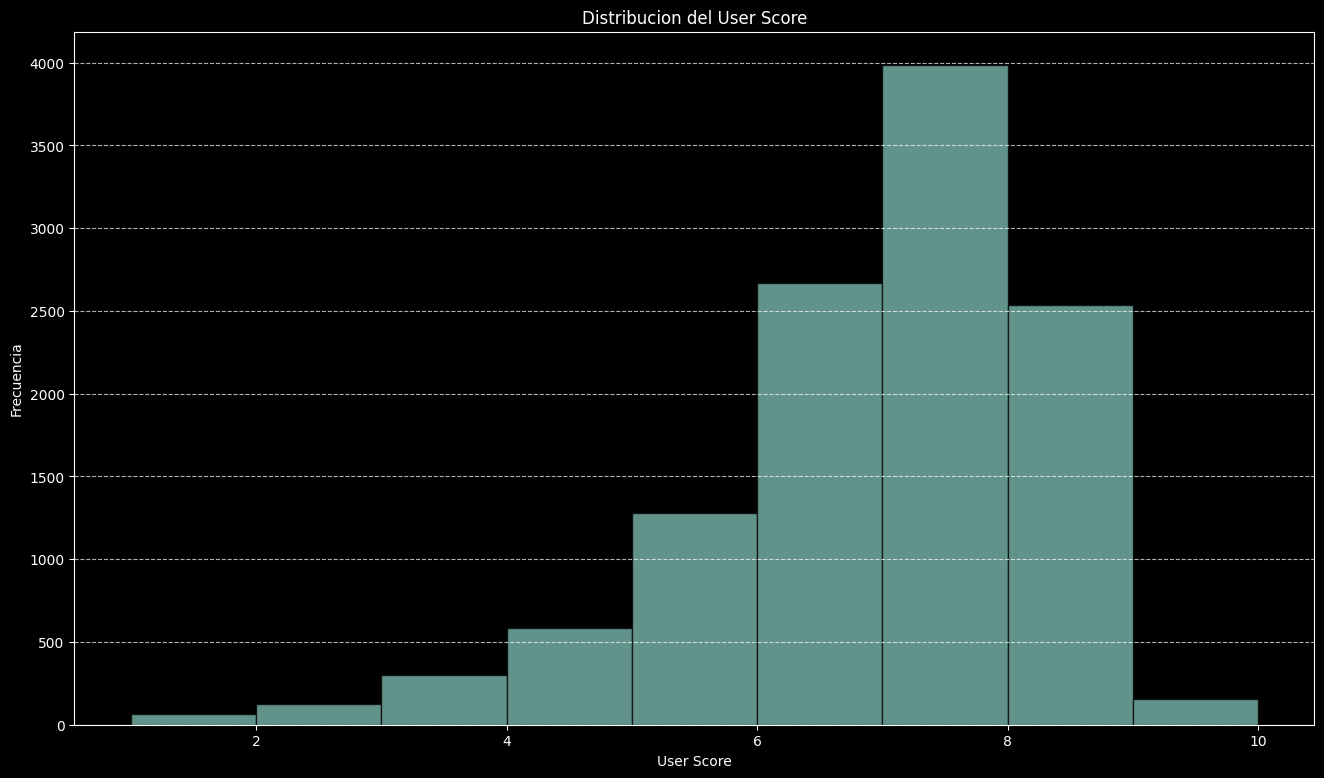

In [7]:
plt.figure(figsize=(16,9))
plt.hist(df['User Score'], bins=range(1,11), edgecolor='black', alpha=0.7)
plt.title('Distribucion del User Score')
plt.xlabel('User Score')
plt.ylabel('Frecuencia')
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.show()

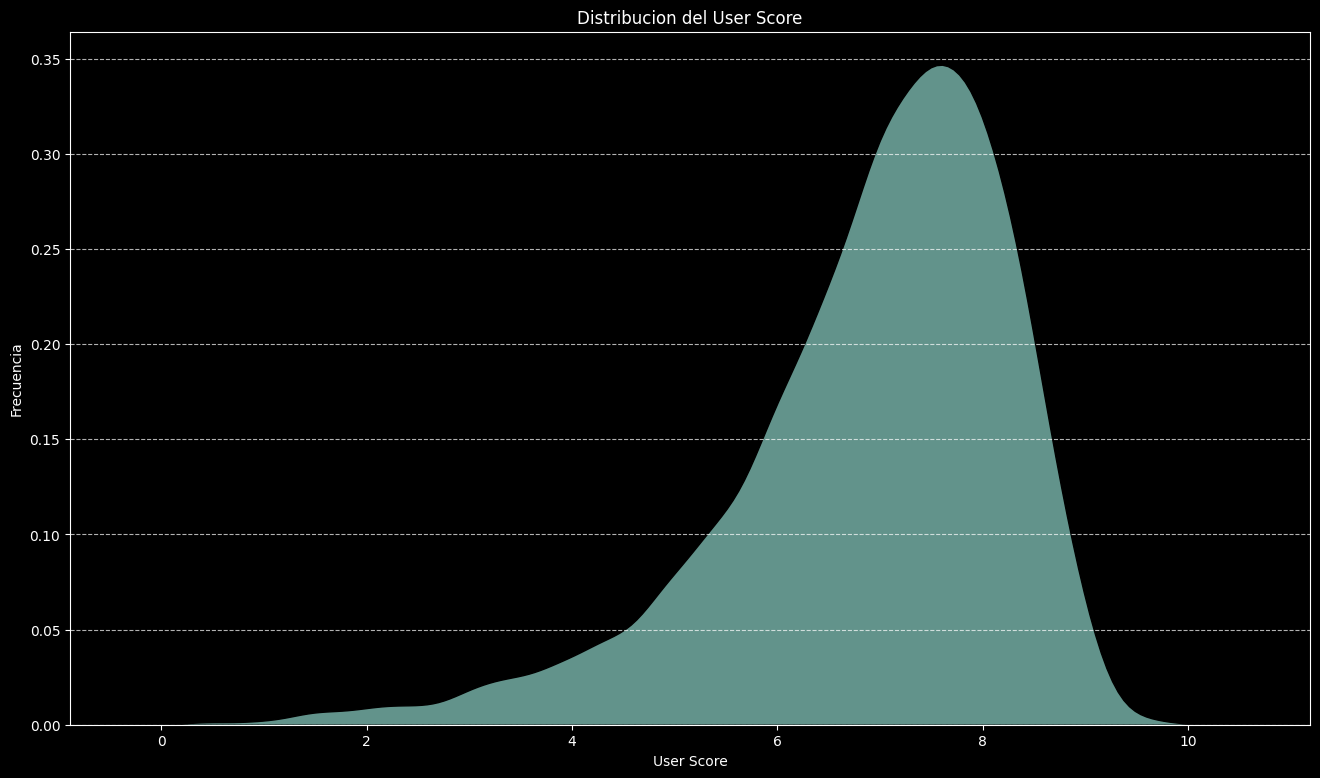

In [8]:
plt.figure(figsize=(16,9))
sns.kdeplot(df['User Score'], fill=True, edgecolor='black', alpha=0.7)
plt.title('Distribucion del User Score')
plt.xlabel('User Score')
plt.ylabel('Frecuencia')
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.show()

In [9]:
unique_genres = set(genre for genres_list in df['Genres Splitted'] for genre in genres_list)


In [10]:
unique_genres

{'2D',
 '3D',
 '4X',
 'Action',
 'Adventure',
 'Aircraft',
 'Application',
 'Arcade',
 'Artillery',
 'Athletics',
 'Auto',
 'Baseball',
 'Basketball',
 'Battle',
 "Beat-'Em-Up",
 'Biking',
 'Billiards',
 'Board',
 'Bowling',
 'Card',
 'Career',
 'Combat',
 'Command',
 'Compilation',
 'Cricket',
 'Dancing',
 'Defense',
 'Edutainment',
 'Exercise',
 'FPS',
 'Fighting',
 'First-Person',
 'Fishing',
 'Football',
 'Future',
 'Gambling',
 'Golf',
 'Gun',
 'Hidden',
 'Hockey',
 'Horizontal',
 'Horse',
 'Hunting',
 'Individual',
 'JRPG',
 'Life',
 'Light',
 'Linear',
 'Logic',
 'MMORPG',
 'MOBA',
 'Management',
 'Marine',
 'Matching',
 'Metroidvania',
 'Miscellaneous',
 'Novel',
 'Object',
 'Open-World',
 'Party',
 'Person',
 'Pet',
 'Pinball',
 'Platformer',
 'Point-and-Click',
 'Puzzle',
 'RPG',
 'RTS',
 'Racing',
 'Rail',
 'Real-Time',
 'Rhythm',
 'Roguelike',
 'Rugby',
 'Sandbox',
 "Shoot-'Em-Up",
 'Shooter',
 'Sim',
 'Simulation',
 'Skating',
 'Skiing',
 'Soccer',
 'Space',
 'Sport',
 'Sp

In [11]:
len(df["Platforms Info"][12])

3

In [12]:
def platform_extract(x) :
    list_platform = []
    rango = len(x)
    for i in range(rango) :
        list_platform.append(x[i]["Platform"])
    return list_platform

In [13]:
def metascore_mean_exctract(x):
    all_metascores = [int(d['Platform Metascore']) if not isinstance(d['Platform Metascore'], str) or d['Platform Metascore'].isdigit() else 0 for d in x]
    filtered_metascores = [score for score in all_metascores if isinstance(score, int)]
    if filtered_metascores:
        return sum(filtered_metascores) / len(filtered_metascores)
    else:
        return None


In [14]:
df["Metascore"] = df["Platforms Info"].apply(metascore_mean_exctract)

In [15]:
df["Platforms"] = df["Platforms Info"].apply(platform_extract)

In [16]:
df["Platforms Info"][12]

[{'Platform': 'PC',
  'Platform Metascore': '74',
  'Platform Metascore Count': 'Based on 34 Critic Reviews'},
 {'Platform': 'Xbox 360',
  'Platform Metascore': '76',
  'Platform Metascore Count': 'Based on 57 Critic Reviews'},
 {'Platform': 'PlayStation 3',
  'Platform Metascore': '70',
  'Platform Metascore Count': 'Based on 46 Critic Reviews'}]

In [17]:
sum([74,76,70])/ 3

73.33333333333333

In [18]:
df

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info,Metascore,Platforms
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,[Action],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M...",83.000000,[iOS (iPhone/iPad)]
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"[Auto, Racing, Sim]",Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5...",61.333333,"[Xbox, PC, GameCube]"
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"[Auto, Racing, Sim]",Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas...",78.000000,[PlayStation 2]
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"[Western, RPG]",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'...",63.000000,[PC]
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,[RPG],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'...",69.000000,[PC]
...,...,...,...,...,...,...,...,...,...,...,...,...
14050,Dragon Age: Origins - Awakening,3/16/2010,BioWare,Electronic Arts,Western RPG,"[Western, RPG]",Rated M For Mature,8.0,516.0,"[{'Platform': 'PlayStation 3', 'Platform Metas...",80.666667,"[PlayStation 3, Xbox 360, PC]"
14051,Lover Pretend,12/1/2022,Idea Factory,Aksys Games,Visual Novel,"[Visual, Novel]",Rated T For Teen,NaN,NaN,"[{'Platform': 'Nintendo Switch', 'Platform Met...",77.000000,[Nintendo Switch]
14052,Alice: Madness Returns,6/14/2011,Spicy Horse,Electronic Arts,Survival,[Survival],Rated M For Mature,8.3,276.0,"[{'Platform': 'PC', 'Platform Metascore': '75'...",71.666667,"[PC, PlayStation 3, Xbox 360]"
14053,Concrete Genie,10/8/2019,Pixel Opus,Sony Interactive Entertainment,Third-Person Adventure,"[Third-Person, Adventure]",Rated E +10 For Everyone +10,8.1,480.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",75.000000,[PlayStation 4]


In [19]:
df.head()

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info,Metascore,Platforms
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,[Action],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M...",83.000000,[iOS (iPhone/iPad)]
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"[Auto, Racing, Sim]",Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5...",61.333333,"[Xbox, PC, GameCube]"
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"[Auto, Racing, Sim]",Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas...",78.000000,[PlayStation 2]
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"[Western, RPG]",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'...",63.000000,[PC]
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,[RPG],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'...",69.000000,[PC]


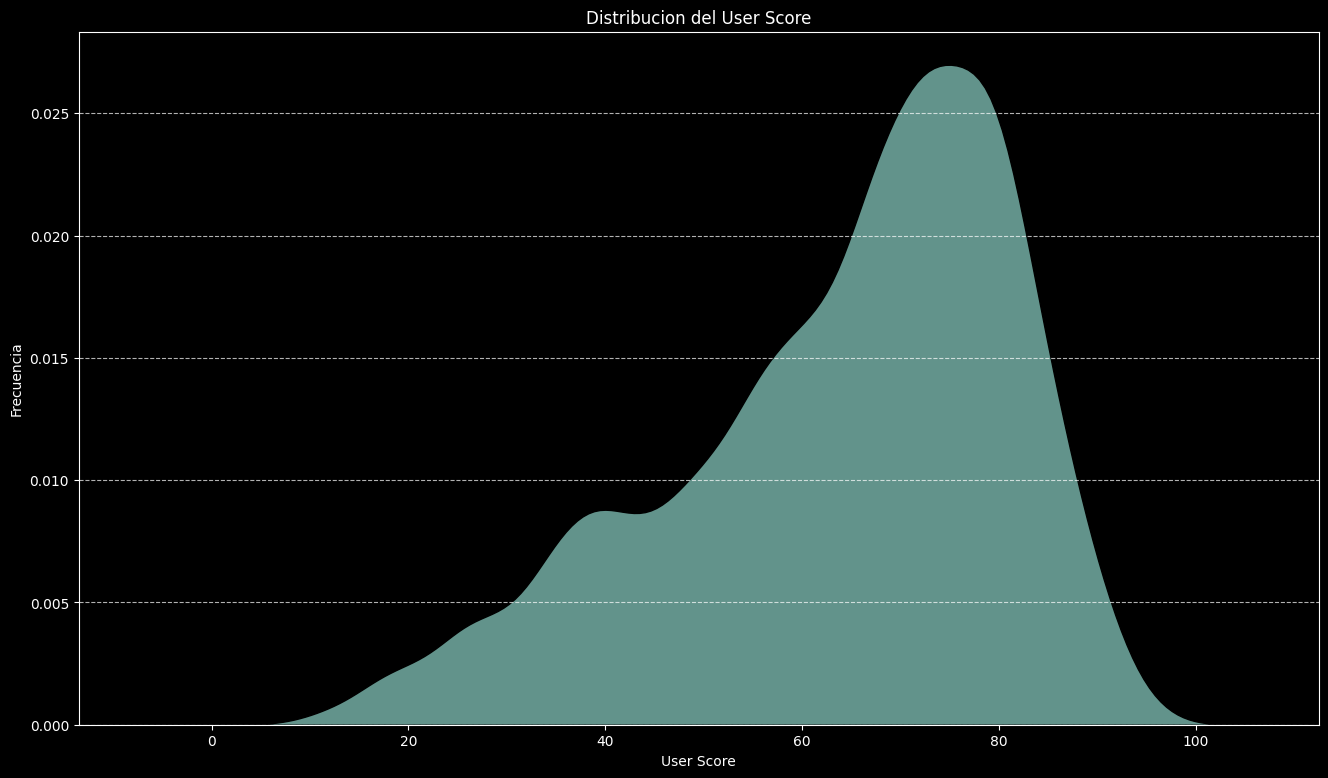

In [20]:
plt.figure(figsize=(16,9))
sns.kdeplot(df['Metascore'], fill=True, edgecolor='black', alpha=0.7)
plt.title('Distribucion del User Score')
plt.xlabel('User Score')
plt.ylabel('Frecuencia')
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.show()

In [21]:
df["Metascore"].mode()

0    73.0
Name: Metascore, dtype: float64

In [22]:
numeric_columns = df.select_dtypes(include=['float64', 'int32'])

In [23]:

# Imputación usando KNN
imputer = KNNImputer(n_neighbors=2)
df_imputado = pd.DataFrame(imputer.fit_transform(numeric_columns), columns=numeric_columns.columns)

In [24]:
df_categorico = df.select_dtypes(include=['object'])

In [25]:
df_categorico

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,Platforms Info,Platforms
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,[Action],NaN,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M...",[iOS (iPhone/iPad)]
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"[Auto, Racing, Sim]",Rated E For Everyone,"[{'Platform': 'Xbox', 'Platform Metascore': '5...","[Xbox, PC, GameCube]"
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"[Auto, Racing, Sim]",Rated E For Everyone,"[{'Platform': 'PlayStation 2', 'Platform Metas...",[PlayStation 2]
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"[Western, RPG]",Rated T For Teen,"[{'Platform': 'PC', 'Platform Metascore': '63'...",[PC]
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,[RPG],NaN,"[{'Platform': 'PC', 'Platform Metascore': '69'...",[PC]
...,...,...,...,...,...,...,...,...,...
14050,Dragon Age: Origins - Awakening,3/16/2010,BioWare,Electronic Arts,Western RPG,"[Western, RPG]",Rated M For Mature,"[{'Platform': 'PlayStation 3', 'Platform Metas...","[PlayStation 3, Xbox 360, PC]"
14051,Lover Pretend,12/1/2022,Idea Factory,Aksys Games,Visual Novel,"[Visual, Novel]",Rated T For Teen,"[{'Platform': 'Nintendo Switch', 'Platform Met...",[Nintendo Switch]
14052,Alice: Madness Returns,6/14/2011,Spicy Horse,Electronic Arts,Survival,[Survival],Rated M For Mature,"[{'Platform': 'PC', 'Platform Metascore': '75'...","[PC, PlayStation 3, Xbox 360]"
14053,Concrete Genie,10/8/2019,Pixel Opus,Sony Interactive Entertainment,Third-Person Adventure,"[Third-Person, Adventure]",Rated E +10 For Everyone +10,"[{'Platform': 'PlayStation 4', 'Platform Metas...",[PlayStation 4]


In [26]:
df_valores_imputados = pd.concat([df_categorico, df_imputado], axis=1)

In [27]:
df_valores_imputados

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,Platforms Info,Platforms,User Score,User Ratings Count,Metascore
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,[Action],NaN,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M...",[iOS (iPhone/iPad)],6.90,14.0,83.000000
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"[Auto, Racing, Sim]",Rated E For Everyone,"[{'Platform': 'Xbox', 'Platform Metascore': '5...","[Xbox, PC, GameCube]",5.90,84.0,61.333333
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"[Auto, Racing, Sim]",Rated E For Everyone,"[{'Platform': 'PlayStation 2', 'Platform Metas...",[PlayStation 2],5.80,41.0,78.000000
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"[Western, RPG]",Rated T For Teen,"[{'Platform': 'PC', 'Platform Metascore': '63'...",[PC],7.50,832.0,63.000000
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,[RPG],NaN,"[{'Platform': 'PC', 'Platform Metascore': '69'...",[PC],6.50,10.0,69.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
5618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.60,31.0,74.000000
5646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.75,20.5,69.000000
6704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.10,133.0,88.000000
7039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.05,418.5,63.000000


In [28]:
df_categorico.reset_index(drop=True, inplace=True)
df_imputado.reset_index(drop=True, inplace=True)
df_final = pd.concat([df_categorico, df_imputado], axis=1)

In [29]:
df_final

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,Platforms Info,Platforms,User Score,User Ratings Count,Metascore
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,[Action],NaN,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M...",[iOS (iPhone/iPad)],6.9,14.0,83.000000
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"[Auto, Racing, Sim]",Rated E For Everyone,"[{'Platform': 'Xbox', 'Platform Metascore': '5...","[Xbox, PC, GameCube]",5.9,84.0,61.333333
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"[Auto, Racing, Sim]",Rated E For Everyone,"[{'Platform': 'PlayStation 2', 'Platform Metas...",[PlayStation 2],5.8,41.0,78.000000
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"[Western, RPG]",Rated T For Teen,"[{'Platform': 'PC', 'Platform Metascore': '63'...",[PC],7.5,832.0,63.000000
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,[RPG],NaN,"[{'Platform': 'PC', 'Platform Metascore': '69'...",[PC],6.5,10.0,69.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
14029,Dragon Age: Origins - Awakening,3/16/2010,BioWare,Electronic Arts,Western RPG,"[Western, RPG]",Rated M For Mature,"[{'Platform': 'PlayStation 3', 'Platform Metas...","[PlayStation 3, Xbox 360, PC]",8.0,516.0,80.666667
14030,Lover Pretend,12/1/2022,Idea Factory,Aksys Games,Visual Novel,"[Visual, Novel]",Rated T For Teen,"[{'Platform': 'Nintendo Switch', 'Platform Met...",[Nintendo Switch],7.2,215.5,77.000000
14031,Alice: Madness Returns,6/14/2011,Spicy Horse,Electronic Arts,Survival,[Survival],Rated M For Mature,"[{'Platform': 'PC', 'Platform Metascore': '75'...","[PC, PlayStation 3, Xbox 360]",8.3,276.0,71.666667
14032,Concrete Genie,10/8/2019,Pixel Opus,Sony Interactive Entertainment,Third-Person Adventure,"[Third-Person, Adventure]",Rated E +10 For Everyone +10,"[{'Platform': 'PlayStation 4', 'Platform Metas...",[PlayStation 4],8.1,480.0,75.000000


In [30]:
df_final_drop_columns_irrelevantes = df_final.drop(columns=['Release Date', 'Developer', 'Publisher', 'Product Rating', 'Platforms Info', 'Genres'])

In [31]:
df_final_drop_columns_irrelevantes

,Title,Genres Splitted,Platforms,User Score,User Ratings Count,Metascore
0,Ziggurat (2012),[Action],[iOS (iPhone/iPad)],6.9,14.0,83.000000
1,4X4 EVO 2,"[Auto, Racing, Sim]","[Xbox, PC, GameCube]",5.9,84.0,61.333333
2,MotoGP 2 (2001),"[Auto, Racing, Sim]",[PlayStation 2],5.8,41.0,78.000000
3,Gothic 3,"[Western, RPG]",[PC],7.5,832.0,63.000000
4,Siege Survival: Gloria Victis,[RPG],[PC],6.5,10.0,69.000000
...,...,...,...,...,...,...
14029,Dragon Age: Origins - Awakening,"[Western, RPG]","[PlayStation 3, Xbox 360, PC]",8.0,516.0,80.666667
14030,Lover Pretend,"[Visual, Novel]",[Nintendo Switch],7.2,215.5,77.000000
14031,Alice: Madness Returns,[Survival],"[PC, PlayStation 3, Xbox 360]",8.3,276.0,71.666667
14032,Concrete Genie,"[Third-Person, Adventure]",[PlayStation 4],8.1,480.0,75.000000


In [32]:
df_categorico_final = df_final_drop_columns_irrelevantes.select_dtypes(include=['object'])

In [33]:
df_categorico_final

,Title,Genres Splitted,Platforms
0,Ziggurat (2012),[Action],[iOS (iPhone/iPad)]
1,4X4 EVO 2,"[Auto, Racing, Sim]","[Xbox, PC, GameCube]"
2,MotoGP 2 (2001),"[Auto, Racing, Sim]",[PlayStation 2]
3,Gothic 3,"[Western, RPG]",[PC]
4,Siege Survival: Gloria Victis,[RPG],[PC]
...,...,...,...
14029,Dragon Age: Origins - Awakening,"[Western, RPG]","[PlayStation 3, Xbox 360, PC]"
14030,Lover Pretend,"[Visual, Novel]",[Nintendo Switch]
14031,Alice: Madness Returns,[Survival],"[PC, PlayStation 3, Xbox 360]"
14032,Concrete Genie,"[Third-Person, Adventure]",[PlayStation 4]


In [34]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df con dos columnas 'lista_columna_1' y 'lista_columna_2' que contienen listas

# Explotas las listas de la primera columna y creas columnas dummy
dummy_columns_1 = pd.get_dummies(df_categorico_final['Genres Splitted'].explode()).groupby(level=0).sum()

# Explotas las listas de la segunda columna y creas columnas dummy
dummy_columns_2 = pd.get_dummies(df_categorico_final['Platforms'].explode()).groupby(level=0).sum()

# Concatenas las columnas dummy al DataFrame original
df_categorico_final_v2 = pd.concat([df_categorico_final, dummy_columns_1, dummy_columns_2], axis=1)

# Eliminas las columnas originales si es necesario
# df = df.drop(['lista_columna_1', 'lista_columna_2'], axis=1)


In [35]:
df_categorico_final_v2

,Title,Genres Splitted,Platforms,2D,3D,4X,Action,Adventure,Aircraft,Application,...,PlayStation 4,PlayStation 5,PlayStation Vita,Wii,Wii U,Xbox,Xbox 360,Xbox One,Xbox Series X,iOS (iPhone/iPad)
0,Ziggurat (2012),[Action],[iOS (iPhone/iPad)],0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4X4 EVO 2,"[Auto, Racing, Sim]","[Xbox, PC, GameCube]",0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,MotoGP 2 (2001),"[Auto, Racing, Sim]",[PlayStation 2],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Gothic 3,"[Western, RPG]",[PC],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Siege Survival: Gloria Victis,[RPG],[PC],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14029,Dragon Age: Origins - Awakening,"[Western, RPG]","[PlayStation 3, Xbox 360, PC]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14030,Lover Pretend,"[Visual, Novel]",[Nintendo Switch],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14031,Alice: Madness Returns,[Survival],"[PC, PlayStation 3, Xbox 360]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14032,Concrete Genie,"[Third-Person, Adventure]",[PlayStation 4],0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [36]:
df_final_final = df_categorico_final_v2.drop(columns=["Genres Splitted", "Platforms"])

In [37]:
df_final_final

,Title,2D,3D,4X,Action,Adventure,Aircraft,Application,Arcade,Artillery,...,PlayStation 4,PlayStation 5,PlayStation Vita,Wii,Wii U,Xbox,Xbox 360,Xbox One,Xbox Series X,iOS (iPhone/iPad)
0,Ziggurat (2012),0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4X4 EVO 2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,MotoGP 2 (2001),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Gothic 3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Siege Survival: Gloria Victis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14029,Dragon Age: Origins - Awakening,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14030,Lover Pretend,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14031,Alice: Madness Returns,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14032,Concrete Genie,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [38]:
df_final_numerico = df_final.select_dtypes(include=['float64', 'int32'])

In [39]:
df_final_numerico

,User Score,User Ratings Count,Metascore
0,6.9,14.0,83.000000
1,5.9,84.0,61.333333
2,5.8,41.0,78.000000
3,7.5,832.0,63.000000
4,6.5,10.0,69.000000
...,...,...,...
14029,8.0,516.0,80.666667
14030,7.2,215.5,77.000000
14031,8.3,276.0,71.666667
14032,8.1,480.0,75.000000


In [40]:
df_final_v1 = pd.concat([df_final_numerico, df_final_final], axis=1)

In [41]:
df_final_v1

,User Score,User Ratings Count,Metascore,Title,2D,3D,4X,Action,Adventure,Aircraft,...,PlayStation 4,PlayStation 5,PlayStation Vita,Wii,Wii U,Xbox,Xbox 360,Xbox One,Xbox Series X,iOS (iPhone/iPad)
0,6.9,14.0,83.000000,Ziggurat (2012),0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.9,84.0,61.333333,4X4 EVO 2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,5.8,41.0,78.000000,MotoGP 2 (2001),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.5,832.0,63.000000,Gothic 3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.5,10.0,69.000000,Siege Survival: Gloria Victis,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14029,8.0,516.0,80.666667,Dragon Age: Origins - Awakening,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14030,7.2,215.5,77.000000,Lover Pretend,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14031,8.3,276.0,71.666667,Alice: Madness Returns,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14032,8.1,480.0,75.000000,Concrete Genie,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [42]:
df_final_v1.to_parquet('./data_frame_final_limpio.parquet')

In [43]:
df_final_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14034 entries, 0 to 14033
Columns: 136 entries, User Score to iOS (iPhone/iPad)
dtypes: float64(3), int64(132), object(1)
memory usage: 14.6+ MB


In [44]:
df_final_v1_numerico = df_final_v1.select_dtypes(include=['float64', 'int32', 'int64'])

In [45]:
df_final_v1_numerico

,User Score,User Ratings Count,Metascore,2D,3D,4X,Action,Adventure,Aircraft,Application,...,PlayStation 4,PlayStation 5,PlayStation Vita,Wii,Wii U,Xbox,Xbox 360,Xbox One,Xbox Series X,iOS (iPhone/iPad)
0,6.9,14.0,83.000000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.9,84.0,61.333333,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,5.8,41.0,78.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.5,832.0,63.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.5,10.0,69.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14029,8.0,516.0,80.666667,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14030,7.2,215.5,77.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14031,8.3,276.0,71.666667,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14032,8.1,480.0,75.000000,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [46]:
df_final_v2_numerico =  df_final_v1_numerico.drop(columns=["User Score", "User Ratings Count"])

In [59]:
X_2 = df_final_v2_numerico.drop(columns="Metascore")
y_2 = df_final_v2_numerico["Metascore"]

In [47]:
y = df_final_v1_numerico["Metascore"]
X = df_final_v1_numerico.drop(columns="Metascore")

In [60]:
import pickle
pca = PCA(n_components=5)

X_pca2 = pca.fit_transform(X_2)
modelo_recomendacion2 = NearestNeighbors(n_neighbors=5, metric='cosine')
modelo_recomendacion2.fit(X_pca2)

knnPickle = open('modelo_recomendacion2.sav', 'wb')

pickle.dump(modelo_recomendacion2, knnPickle)
knnPickle.close()

In [94]:

X_pca2 = pca.fit_transform(X_2)
modelo_recomendacion2 = NearestNeighbors(n_neighbors=5, metric='cosine')
modelo_recomendacion2.fit(X_pca2)

NearestNeighbors(metric='cosine')

In [98]:
nueva_fila = X_pca2[0].reshape(1, -1)
distancias, indices = modelo_recomendacion2.kneighbors(nueva_fila)

# Los índices representan las recomendaciones cercanas en función de las características codificadas
recomendaciones_cercanas = df_final_v1_numerico.iloc[indices[0]]

In [96]:
for i in distancias : 
    for j in i :
        print(j)

0.0
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16
1.1102230246251565e-16


In [99]:
recomendaciones_cercanas

,User Score,User Ratings Count,Metascore,2D,3D,4X,Action,Adventure,Aircraft,Application,...,PlayStation 4,PlayStation 5,PlayStation Vita,Wii,Wii U,Xbox,Xbox 360,Xbox One,Xbox Series X,iOS (iPhone/iPad)
10,6.40,7.0,77.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13513,5.75,20.5,69.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13520,6.80,93.5,70.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4242,6.50,37.0,54.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10637,6.20,6.0,87.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [97]:
modelo_recomendacion = NearestNeighbors(n_neighbors=5, metric='cosine')
modelo_recomendacion.fit(X_pca)
nueva_fila = X_pca[0].reshape(1, -1)
distancias, indices = modelo_recomendacion.kneighbors(nueva_fila)

# Los índices representan las recomendaciones cercanas en función de las características codificadas
recomendaciones_cercanas = df_final_v1_numerico.iloc[indices[0]]

In [53]:
recomendaciones_cercanas

,User Score,User Ratings Count,Metascore,2D,3D,4X,Action,Adventure,Aircraft,Application,...,PlayStation 4,PlayStation 5,PlayStation Vita,Wii,Wii U,Xbox,Xbox 360,Xbox One,Xbox Series X,iOS (iPhone/iPad)
0,6.9,14.0,83.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10275,6.9,15.0,83.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11068,6.9,12.0,87.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7924,6.9,11.0,84.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13045,7.0,7.5,72.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
df_final_v1.loc[0]

User Score                        6.9
User Ratings Count               14.0
Metascore                        83.0
Title                 Ziggurat (2012)
2D                                  0
                           ...       
Xbox                                0
Xbox 360                            0
Xbox One                            0
Xbox Series X                       0
iOS (iPhone/iPad)                   1
Name: 0, Length: 136, dtype: object

In [55]:
df_final_v1.loc[10275]

User Score                                                          6.9
User Ratings Count                                                 15.0
Metascore                                                          83.0
Title                 Earthcore: Shattered Elements - Epic Card Batt...
2D                                                                    0
                                            ...                        
Xbox                                                                  0
Xbox 360                                                              0
Xbox One                                                              0
Xbox Series X                                                         0
iOS (iPhone/iPad)                                                     1
Name: 10275, Length: 136, dtype: object

In [56]:
import pickle

knnPickle = open('modelo_recomendacion.sav', 'wb')

pickle.dump(modelo_recomendacion, knnPickle)
knnPickle.close()

In [57]:
index = df_final_v1[df_final_v1['Title'].str.contains("EarthCore", case=False, na=False)].index[0]

In [58]:
index

10275